In [1]:
from pose import *
import warnings
warnings.filterwarnings('ignore')

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
reps = {}
main(reps)

In [5]:
print(reps)

{'count': 5, 'flag': 1, 'time': {1: 2.7843587398529053, 2: 2.798999786376953, 3: 2.828634023666382, 4: 5.715748310089111, 5: 1617711933.7450998}, 'correct_form': {0: 65, 1: 49, 2: 49, 3: 61, 4: 115, 5: 1}, 'wrong_form': {0: 90, 1: 10, 2: 10, 4: 9, 5: 17}}


In [4]:
for i in range(1, reps['count']):
    reps['time'][i] = reps['time'][i+1] - reps['time'][i]
    print(i, reps['time'][i])

1 2.7843587398529053
2 2.798999786376953
3 2.828634023666382
4 5.715748310089111


In [6]:
x = range(1, reps['count'])
y = list(reps['time'].values())[:reps['count']-1]

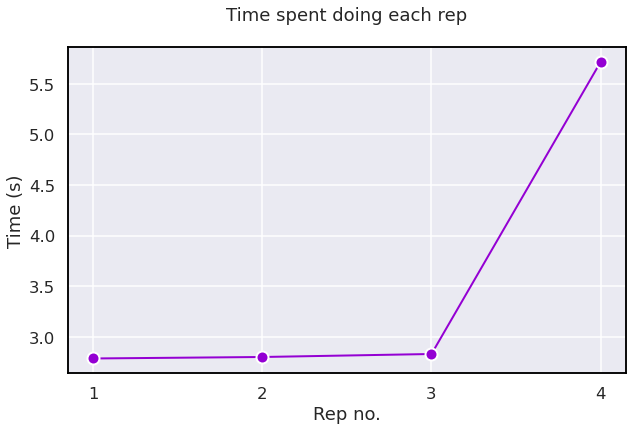

In [9]:
figure = plt.figure(figsize=(10, 6))

sns.set_style('darkgrid', {'axes.edgecolor': 'black'})
sns.set_context('talk')
sns.lineplot(x, y, color='darkviolet', lw=2,
            marker='o', ms=12, mec='white', mew=2)

# plt.fill_between(x, y,)
plt.xticks(x)
plt.xlabel('Rep no.')
plt.ylabel('Time (s)')
plt.title("Time spent doing each rep\n")

plt.show();